## Task: Extract Features From Dataset   (40 Marks)

Use **NLTK** to extract **features** from the **Toxic Comments** dataset.\
The **features** will be used to train various Machine Learning models to identify toxic comments.

Possible **features** to extract:
* check if a word is in a list of swear words, or a list of words that are hate speech
* check if punctuation is used in the *body* of a word rather than at the end of the sentence
* check if words such as `a$$` are used where letters are replaced by visually similar symbols
* sentence length i.e., how many words a sentence has
* average word length in a sentence
* unusually high number of exclamation marks, which could represent the author being frustrated or angry
* etc.


### Transforming Data Into Features

We represent the data as matrices/vectors. So we are transforming the dataset into a matrix representation. None of the models accept text input! Example:\
`X = [[0, 0], [1, 3], [2, 0], [3, 1]]`\
`Y = [0, 1, 2, 3]`

`X` is a features matrix.
`Y` is a matrix of the target classes/output the model is trying to predict. In this case we have four classes `[0, 1, 2, 3]`. The actual classes could be non-toxic, toxic, very toxic, and extremely toxic, but we have to replace them by a number.

In `X` we have four samples/datapoints/examples, the first being `[0, 0]`. Each column in the sample corresponds to a feature.\
For example, the first column could be number of swear words in comment and the 2nd column could be percentage of capitalized letters in a comment. In matrix entry form:\
`[number of swear words in comment, percentage of capitalized letters in a comment]`\
Thus `[0, 0]` would correspond to a comment with zero swear words and zero capitalized letters.


### Rubric

We will be evaluating this section in part by how clever your choice of features were (and that you were able to extract them).
Simple sets of features may not be as informative as complex setds of features, but simple features are easier to extract from a dataset compared to complex features.

A breakdown of the marking for this task:
* [**10 marks**] basic features gathered (trivial)
* [**25 marks**] quality features gathered (advanced), corresponding to unusual features or clever features most would not have considered
* [**5 marks**] formatting the features and output correctly so it can be used immediately downstream for the machine learning classifiers without any further preprocessing needing to be done at that stage

In [ ]:
# EXAMPLE CODE: check if a word is in a list of words
list_of_words = ["house", "hat", "war"]
word = "hat"
print("Is 'hat' in the wordlist?", word in list_of_words)

word = "Hat"
print("Is 'Hat' in the wordlist?", word in list_of_words)

In [ ]:
# EXAMPLE CODE: check if a character is in a list of characters
character_string = '?.",!@$%^&*()\n' # using a String as if it were a list
character = "?"
print("Is '?' in the characterlist?", character in character_string)

character = "\n"
print("Is '\\n' (newline) in the characterlist?", character in character_string)

In [ ]:
# EXAMPLE CODE: for more code fragments that may be useful
#               check the Discord server (I will not be adding new snippets to this Task here)

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that extracts features from the dataset.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# read dataset from file


# iterate over each data sample in the dataset
#     extract features from each data sample


# prepare the features in the correct format


# normalize/scale the features and outputs in the range [0-1]
#     note that each model may have a different set of requirements as to how it expects its input


# prepare output values in the correct format
# For classification the output will be categories such as [toxic, non_toxic, severe_toxic, ...]
#     the classification models want these categories represented as integer values which correspond to the original
#     categories, such as [0, 1, 2, ...] where 0=toxic, 1=non_toxic, 2=severe_toxic, ...


----
<div class="alert alert-info">
    <h4>PRO TIP</h4>
    Classifiers take two arrays as input: <strong>array X</strong> and <strong>array y</strong>.</br>
    <strong>array X</strong> has shape <tt>(number_of_samples, number_of_features)</tt> containing the training samples feature data</br>
    <strong>array y</strong> of class labels/outputs (strings or integers) has shape <tt>(number_of_samples)</tt></p>
    <p></p>
    <p style="text-indent:0px"><tt>print(photos.shape, labels.shape)</br>
    num_samples = labels.shape[0]<br>
    x = np.reshape(photos, (num_samples, -1))<tt></p>
</div>

## Task: Decision Tree   (5 Marks)

Build a *decision tree* model to identify toxic comments.

From Norvig & Russel's "*AI: A Modern Approach*" (pg. 707, 3rd ed.):
> In many areas of industry and commerce, decision trees are usually the first method tried when a classification method is to be extracted from a data set. One important property of decision trees is that it is possible for a human to understand the reason for the output of the learning algorithm. (Indeed, this is a legal requirement for financial decisions that are subject to anti-discrimination laws.) This is a property not shared by some other representations, such as neural networks.

From https://scikit-learn.org/stable/modules/tree.html:
> `DecisionTreeClassifier` is capable of both:
> * **binary classification** where the labels are `[-1, 1]`
> * **multiclass classification** where the labels are `[0, ..., K-1]`


### Type Of Task We Are Working With

Note our task isn't a **classification** task (i.e., predicting a *discrete* value) but a **regression** task (i.e., predicting a *continuous* value). We could pursue one of two approaches:
* keep the task as a regression task and use regression versions for each model (e.g., *decision tree regression*, *SVM for regression*, *neural network for regression*, etc.)
* convert the regression task into a classification task where we are predicting a range of values rather than a specific value (i.e., discretizing the output space)

To discretize the output we are predicting (i.e., convert a continuous value into a set of points/classes/categories), instead of predicting the temperature from 0 degrees Fahrenheit to 100 degrees Fahrenheit, we predict a temperature range:
* **freezing** (0 degrees to 20 degrees Fahrenheit)
* **cold** (20 degrees to 40 degrees Fahrenheit)
* **moderate** (40 degrees to 60 degrees Fahrenheit)
* **warm** (60 degrees to 80 degrees Fahrenheit)
* **hot** (80 degrees to 100 degrees Fahrenheit)

which transforms the regression problem into a 5-class classification task.

### Decision Trees For Classification

Example code for a **Decision Tree** performing classification. The **Decision Tree** model is predicting one category from a set of categories, such as which genre a film belongs to (`Horror`, `Comedy`, `Action`, etc.):

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
from sklearn import tree

X = [[0, 0, -1], [1, 1, 1], [1, 10, 9], [-3, 0, 33]]
Y = [0, 1, 4, 1]

# DecisionTreeClassifier takes as input two arrays: X & Y
#    an array X, sparse or dense, of shape (number_of_samples, number_of_features) holding the training samples
#    and an array Y of integer values, of shape (number_of_samples) holding the class labels for the training samples
clf = tree.DecisionTreeClassifier()

# train the decision tree classifier model
clf = clf.fit(X, Y)

# after being fitted, predict from a new set of samples
clf.predict([[2., 2., 10.]])


# plot a visualization of the decision tree
tree.plot_tree(clf)


# a text visualization of the decision tree
from sklearn.tree import export_text
text_tree = export_text(clf, feature_names=["First Feature", "Height Feature", "Salary Feature"])
print("Text visualization of decision tree:\n", text_tree)

### Decision Trees For Regression

Regression using **Decision Trees** is [found here](https://scikit-learn.org/stable/modules/tree.html#regression).

Example code of a **Decision Tree** for regression (where the **Decision Tree** model is predicting a continuous value):

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# code from https://scikit-learn.org/stable/modules/tree.html#regression

from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]


clf = tree.DecisionTreeRegressor()

# train the decision tree regression model
clf = clf.fit(X, y)

# after being fitted, predict from a new set of samples
clf.predict([[1, 1]])

# plot a visualization of the decision tree
tree.plot_tree(clf)

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Decision Tree classifier.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Train the model


# Evaluate the model


----
## Task: SVM Classifier   (5 Marks)

Build an [SVM classifier](https://scikit-learn.org/stable/modules/svm.html#classification) that identifies toxic comments.\
Use the **SVM**'s default parameters.

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from: https://scikit-learn.org/stable/modules/svm.html#classification

from sklearn import svm

# the dataset  X:features, y:output values we are trying to predict
X = [[0.0, 0], [1.2, 1]]
y = [0, 1]

clf = svm.SVC()

# train the model
clf.fit(X, y)

# after being fitted, predict new values
clf.predict([[2., 2.]])

**SVM** for regression:

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from: https://scikit-learn.org/stable/modules/svm.html#regression

from sklearn import svm

# the dataset  X:features, y:output values we are trying to predict
X = [[0, 0], [1, 1]]
y = [0, 1.2]

clf = svm.SVR()

# train the model
clf.fit(X, y)

# after being fitted, predict new values
clf.predict([[2., 2.]])

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements an SVM classifier.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Train the model


# Evaluate the model



----
## Task: Language Model   (20 Marks)

Build a *language model* to identify toxic comments.\
Recall that language models can be built using n-grams.\
Also refer to **Chapter 3** in "[*Speech and Language Processing*](https://web.stanford.edu/~jurafsky/slp3)" (freely available textbook!) by Jurafsky & Martin for explanations of **N-gram Language Models**.

Construct a **Tri-gram** language model with **backoff smoothing**.\
Refer to **Quiz #4** for insights into **n-gram** language models.

A breakdown of the marking for this task:
* [**15 marks**] trigram language model implemented
* [**5 marks**] back-off smoothing implemented

In [ ]:
# refer to Quiz #4 for help with n-gram language models

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Tri-gram Language Model.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Create a Trigram language model


# Create a Bigram language model


# Create a Unigram language model


# Compute the probability a comment is toxic


# Evaluate the model


----
## Task: Random Forest Model   (5 Marks)

Build a *random forest model* to identify toxic comments.

### Random Forest Classifier

The **scikit-learn** implementation of **Random Forest** "*combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class*".\
Code examples for implementing a **Random Forest Classifier** is [here](https://scikit-learn.org/stable/modules/ensemble.html#forest).\
API information on **Random Forest Classifiers** is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).


### Random Forest Regressor

A **Random Forest** model for a regression task is conceptually identical to the classifier version above.


### Implementation

Using **scikit-learn**, create a **Random Forest** model consisting of the following parameters (model parameters not specified can be left to their default values):
* number of estimators = 100


**Random Forest** for classification:

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from: https://scikit-learn.org/stable/modules/ensemble.html#forest
# Classification

from sklearn.ensemble import RandomForestClassifier

X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = RandomForestClassifier(n_estimators=10)

clf = clf.fit(X, Y)

**Random Forest** for regression:

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(X, y)

print(regr.predict([[0, 0, 0, 0]]))

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Random Forest Classifier.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Train the model

# Evaluate the model


## Task: Voting Ensemble   (10 Marks)

A **Voting Ensemble** classifier "*combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels*". "*In his highly influential Society of Mind theory, Marvin Minsky proposes that human minds are constructed from an ensemble of agents*" (from "**AI: A Modern Approach**" pg. 434, 3rd ed.).

From https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier:
> *The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.*

Using **scikit-learn**, create two **Voting Ensemble Classifiers** (*hard voting* and *soft voting*) consisting of the following models:
* SVM classifier
* Decision Tree classifier
* Random Forest classifier

Use the default parameters for both *hard voting* and *soft voting* classifiers.

Code examples for implementing a **Voting Ensemble Classifier** is [here](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier).\
API information on **Voting Ensemble Classifiers** is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier).

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from:  https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Load some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)

# The Ensemble classifier
# 'estimator' is another name for 'model' or 'learner'
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft',
                        weights=[2, 1, 2])

# train the individual classifiers first
clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
# then train the ensemble of the trained classifiers (clf1, clf2, & clf3)
eclf = eclf.fit(X, y)

# make predictions
print("Ensemble classifier's predictions:\n", eclf.predict(X))
print("\nThe resulting dimensions of the Ensemble classifier:", eclf.transform(X).shape)

A **Voting Ensemble** example for regression is [found here](https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor).

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from:  https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training individual models
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

# create an ensemble from the individual models
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

ereg = ereg.fit(X, y)

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Voting Ensemble classifier.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Train the model


# Evaluate the model



----
## Task: Neural Network   (5 Marks)

Build a *neural network* to identify toxic comments.

Note we will be building a *very superficial* neural network model.\
For those interested in learning more, please take **CMPT 410** (Machine Learning) and/or **CMPT 418** (Deep Learning).

<!--
A [reference tutorial from Google](https://developers.google.com/machine-learning/guides/text-classification/) provides an overview of a text classification workflow\
![](https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationFlowchart.png).
-->

The example below uses an existing (*already trained*) model downloaded from **Tensorflow**'s **Hub**.


In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# from   https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds


########################
### SET UP THE DATASET
########################

# Uses the IMDB Movie Reviews dataset
# Split the training set into 60% and 40% to get
#     15,000 training examples
#     10,000 examples for validation
#     25,000 testing examples
train_data, validation_data, test_data = tfds.load( name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

# print first 10 examples
print(train_examples_batch)
# print the first 10 labels
train_labels_batch


####################################
### SET UP THE NEURAL NETWORK MODEL
####################################

# create a Keras layer that uses a TensorFlow Hub model to embed the sentences
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

# build the full model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

# configure the model to use an optimizer and a loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


####################################
### TRAIN THE NEURAL NETWORK MODEL
####################################

# Train the model for 10 epochs in mini-batches of 512 samples
# This is 10 iterations (epochs) over all samples in the x_train and y_train tensors
# While training, monitor the model's loss and accuracy on the 10,000 samples from the validation set
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)


######################################
### EVALUATE THE NEURAL NETWORK MODEL
######################################

# Evaluate the model
# Two values will be returned:
#    Loss (a number which represents our error, lower values are better)
#    Accuracy
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Neural Network.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below


# Train the model


# Evaluate the model



----
## Task: Naive Bayes Classifier   (5 Marks)

Build a **Naive Bayes classifier** to identify toxic comments.

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from:  https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

import numpy as np
from sklearn.naive_bayes import GaussianNB

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

clf = GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))

### Regression (Linear Model)

For regression, use a **Linear Regression** model instead of *Naive Bayes*.\
A succinct overview of using a [linear model to detect diabetes](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) provides a good explanation of an end-to-end experimental workflow.

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW
# Code from:  https://scikit-learn.org/stable/modules/linear_model.html

from sklearn import linear_model

reg = linear_model.LinearRegression()

# train the model with data
reg.fit([[0, 0], [1, 1], [2, 2]],
        [0, 1, 2])

# make predictions
prediction = reg.predict([[-0.8, -1]])
print("Prediction:", prediction)

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code that implements a Naive Bayes Classifier.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

# Train the model


# Evaluate the model



## Task: Evaluation   (10 Marks)

The following classification models are to be evaluated (default parameters can be used in both models):
* [Gaussian Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) 
* [Decision Tree classifier](https://scikit-learn.org/stable/modules/tree.html#classification)
* SVM classifier
* Tri-gram Language Model
* Neural Network classifier
* Random Forest classifier
* Ensemble Model classifier

Models will be *trained* on the **training data**.\
Models will be *evaluated* on the **test data**.

<font color=red>**TBD**.<font color=black> The below is *not* the final evaluation method but the one used in the **Kaggle** competition.

<font color=lightgray>

The evaluation description for the original **Idenifying Toxic Comments** task needs to be updated.
    
> Submissions are evaluated on the **mean column-wise ROC AUC**.\
> In other words, the score is the **average of the individual AUCs of each predicted column**.
> 
> **Submission File**
> 
> For each id in the test set, you must predict a probability for each of the six possible types of comment toxicity (*toxic, severetoxic, obscene, threat, insult, identityhate*). The columns must be in the same order as shown below. The file should contain a header and have the following format:
> 
> 		id,toxic,severe_toxic,obscene,threat,insult,identity_hate
> 		00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
> 		0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
> 		...
> 		etc.

    
<font color=black>

### How To Evaluate A Machine Learning Model

We will assign a toxicity score to two comments where one of the comments are determined by humans to be more toxic than the other comment.
The performance of a model is measured by how many of the comment pairs agree with human rankings.

For example, **Comment 1** (from `validation_data.csv`) is given a score of 1.65 &
**Comment 2** is given a score of 76, resulting in **Comment 2** being more toxic than **Comment 1**. If this matches the human assessment then we score 1/1. If not, then the score is 0/1.
    
From the [task's description on **Kaggle**](https://www.kaggle.com/c/jigsaw-toxic-severity-rating/overview/evaluation):
> *For each of the approximately 200,000 pair ratings in the ground truth test data, we use your predicted toxicity score to rank the comment pair. The pair receives a 1 if this ranking matches the annotator ranking, or 0 if it does not match.*
    
The data used in the evaluation comes from `validation_data.csv`.

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW

# keep track of how many comment pairs we correctly rank
total_correct_comment_pair_rankings = 0

# get next pair of comments from validation_data.csv
# NOTE: comment1 is from the column corresponding to "LESS TOXIC"
#       comment2 is from the column corresponding to "MORE TOXIC"
comment1 = "Comment from Wikipedia! (less toxic comment)"
comment2 = "ANOTHER Comment from Wikipedia! Swear word: bA$$ (more toxic comment)"

# convert the comment's text into a feature vector e.g., [0, 0, 2.51, 1, ...]
comment1_features = extract_features(comment1)
comment2_features = extract_features(comment2)

# compute the toxicity score of each comment
toxicicity_score_of_comment1 = some_model.predict(comment1_features)
toxicicity_score_of_comment2 = some_model.predict(comment2_features)

if toxicicity_score_of_comment2 > toxicicity_score_of_comment1:
    total_correct_comment_pair_rankings = total_correct_comment_pair_rankings + 1

<div class="alert alert-danger">
    <h4>WRITE CODE</h4>
    In the cell below, write the code for evaluating a model.
</div>

In [ ]:
# YOUR CODE IN THIS CELL
raise NotImplementedError() # Remove this after you have started implementing your code below

----
# Task: Project Report   

The total marks for all of the sections below is **80 Marks**.

This section corresponds to the write-up of the project. Your write-up is to be included within this **Jupyter Notebook** below (the code for this assignment is in the code cells above).\
The **Project Report** will consist of a few sections that each discuss a different stage of the end-to-end experiment.

## Overview    (5 Marks)

Discuss:
* the problem/task you are addressing
* provide concrete examples of the problem
* why the problem is worth the time and effort trying to solve
* compare the task with other tasks that are similar

The following are optional:
* *Related Work* i.e., what have other people tried
* historical background of the problem
* discuss strategies used in other tasks that are similar to **Toxic Comment Identification**
* discuss the differences with those tasks that are similar to **Toxic Comment Identification**

## Dataset    (5 Marks)

Discuss:
* the dataset's size
* languages dataset contains
* anything unusual about the data
* how representative the dataset is of everyday communication
* etc.

## Features    (5 Marks)

Discuss:
* the features that were extracted
* the number of features

## Models    (5 Marks)

Discuss:
* the models used
* any specific parameters, configuration, or settings of each model
* any differences in how each model was trained

## Evaluation    (5 Marks)

This section discusses:
* how you evaluated the models in order to compare their relative performance
* evaluating models based on *overall performance*
* use visuals, tables, charts, graphs, etc. to communicate results

## Discussion    (15 Marks)
 
Compare the performance of the above models on **Identifying Toxic Comments**.\
Use visuals, charts, graphs, etc. to communicate your results.

Discuss:
* your findings in general
* compare the performance of the various models (was the performance what you expected?)
* which system performed best? why?
* which system had the worst performance? why?
* discuss the reasons which lead to the results from the evaluation
* provide some ideas you would like to have tried (provided you had more time or resources) that could potentially improve the performance of the models or a question that you were interested in exploring (i.e., *Future Work*)

### Plotting & Visualizations

Examples of various plots and visualizations.

In [ ]:
# EXAMPLE CODE: COMMENT OUT THIS CODE CELL AFTER IMPLEMENTING YOUR CODE BELOW

# TODO add example visuals

import seaborn

# Load example miles per gallon dataset
mpg = seaborn.load_dataset("mpg")

# Plot miles per gallon against horsepower
seaborn.relplot(x="horsepower", y="mpg", hue="origin", size="weight", sizes=(40, 400), alpha=0.4, data=mpg)

# Display joint distribution of the features
seaborn.pairplot(mpg, diag_kind='kde')

<div class="alert alert-danger">
    <h1>YOUR PROJECT REPORT BEGINS BELOW THIS CELL</h1>
</div>

**INFORMATION**\
Student Name: *Santiago Hoyos*\
Student ID: *300206343*\
Student SFU Email: *santiago.hoyos@student.ufv.ca*

# Overview

This project aims to perform sentiment analysis on a large dataset of Yelp reviews using natural language processing techniques. 

I am interested in understanding how people perceive different businesses and locations based on their reviews. By analyzing the sentiment of the reviews, you can identify patterns and trends in people's opinions and experiences, and gain insights into what factors drive positive or negative reviews. For example, you may find that people tend to give positive reviews to businesses that offer good customer service or have a friendly atmosphere, while negative reviews may be driven by factors such as poor quality of food or service.

Moreover, the project can be extended to include feature extraction techniques to identify key topics or themes mentioned in the reviews, such as food, service, ambiance, and location. By analyzing the frequency and sentiment of these topics across different businesses and locations, you can gain a deeper understanding of what aspects of a business or location are most important to people and how they influence overall customer satisfaction.

Overall, this project can provide valuable insights into people's opinions and experiences with businesses and locations, which can be useful for businesses, policymakers, and researchers alike.

# Dataset

The Yelp dataset is a large dataset of customer reviews from Yelp, a popular online platform for businesses and customers to connect. The Yelp dataset contains over 7 million reviews from various businesses and locations, making it a rich source of information about people's opinions and experiences. The dataset also includes information about the businesses, such as their location, category, and other attributes. In addition, the dataset contains user profiles, including their name, location, and other demographic information. The dataset can be found in their website: https://www.yelp.com/dataset

Each review in the dataset includes the text of the review, as well as the star rating given by the user, ranging from 1 to 5 stars. The text of the reviews is preprocessed, including removing stop words.

The dataset is provided in JSON format, with separate files for reviews, businesses, and user profiles. The dataset is quite large, with a total size of over 4 GB

# Features

*Your text here.*

In [11]:
import pandas as pd
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

from collections import Counter
import json
import string
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
# Load the Yelp review dataset
data_path = "C:/Users/Hoyos O/Desktop/Universidad/Séptimo Semestre/Natural language processin COMP 482/Project/yelp_academic_dataset_review.json"
data = []
with open(data_path, encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 10000:
            break
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Tokenize the text data into words
df['text_tokens'] = df['text'].apply(word_tokenize)

# Extract the most common words
# Get the most common words in the text data
all_words = [word for text in df['text_tokens'] for word in text if word.isalpha() and word not in stop_words]
word_freq = FreqDist(all_words)
top_words = word_freq.most_common(20)

# Remove stopwords and punctuation from the list of most common words
stopwords = set(nltk.corpus.stopwords.words('english'))
top_words = [(word, freq) for (word, freq) in top_words if word.lower() not in stopwords and word not in string.punctuation]

# Print the most common words
print("Top 20 most common words:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Count the frequency of different types of punctuation
punct_freq = Counter([char for text in df['text'] for char in text if char in string.punctuation])
print(f"Punctuation usage: {punct_freq}")

# Use the VADER lexicon to score the sentiment of each review
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x))
df['sentiment_label'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0 else 'negative')
print(f"Sentiment labels: {df['sentiment_label'].value_counts()}")

# Use NLTK's named entity recognition functionality to identify named entities in the reviews
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
named_entities = []
for text in df['text']:
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    chunks = nltk.ne_chunk(pos_tags)
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            named_entities.append(' '.join(c[0] for c in chunk))
named_entities_freq = Counter(named_entities)
most_common_entities = named_entities_freq.most_common(10)
print(f"Most common named entities: {most_common_entities}")

# Use NLTK's POS tagging functionality to identify the parts of speech in the reviews
pos_tags = []
for tokens in df['text_tokens']:
    pos_tags.append(nltk.pos_tag(tokens))
noun_freq = Counter([tag[0] for tags in pos_tags for tag in tags if tag[1] == 'NN'])
most_common_nouns = noun_freq.most_common(10)
print(f"Most common nouns: {most_common_nouns}")

Top 20 most common words:
food: 4858
place: 4840
good: 4745
great: 3811
time: 3051
like: 2990
get: 2867
would: 2802
service: 2791
back: 2721
one: 2603
go: 2478
really: 2163
Punctuation usage: Counter({'.': 74151, ',': 35975, "'": 19023, '!': 12537, '-': 7063, ')': 4055, '(': 3779, '"': 3130, ':': 1667, '$': 1569, '?': 1567, '/': 1439, '&': 1004, ';': 576, '*': 300, '+': 200, '%': 171, '#': 88, '=': 71, '_': 41, '~': 33, '[': 31, ']': 31, '@': 27, '\\': 3, '^': 2, '}': 1, '`': 1})
Sentiment labels: positive    8776
negative    1224
Name: sentiment_label, dtype: int64


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hoyos O\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Most common named entities: [('Great', 889), ('Food', 355), ('Service', 257), ('French', 219), ('Italian', 216), ('Nashville', 189), ('Mexican', 187), ('New Orleans', 177), ('Philly', 168), ('BBQ', 161)]
Most common nouns: [('food', 4858), ('place', 4787), ('time', 3051), ('service', 2782), ('order', 1505), ('staff', 1475), ('restaurant', 1335), ('menu', 1261), ('bar', 1097), ('experience', 1094)]


After analyzing a dataset of restaurant reviews, the following insights were found:

    The top 5 most commonly used words are "food", "place", "good", "great", and "time".
    The frequency of punctuation usage shows that the most commonly used punctuation marks are period, comma, and apostrophe.
    When classifying reviews into sentiment labels, it was found that around 87.76% of the reviews are labeled as positive and 12.24% are negative.
    The most common named entities found in the reviews were "Great", "Food", "Service", "French", and "Italian".
    The most common nouns found in the reviews were "food", "place", "time", "service", and "order".

Based on these results, it appears that food and place are the most talked-about aspects of the restaurant experience in the reviews, and that positive sentiment is more common than negative sentiment. The most common named entities suggest that French, Italian, Mexican, and BBQ cuisine are popular choices, and that Nashville, New Orleans, and Philly are frequently mentioned locations. Additionally, the most common nouns suggest that food, service, and time are key factors in the restaurant experience.

# Models

In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

from collections import Counter
import json
import string
nltk.download('vader_lexicon')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Hoyos
[nltk_data]     O\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


c:\Users\Hoyos O\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Precision: 0.94, Recall: 0.91, F1 score: 0.93
Accuracy: 0.88
                 Predicted Negative  Predicted Positive
Actual Negative                 155                  93
Actual Positive                 155                1597


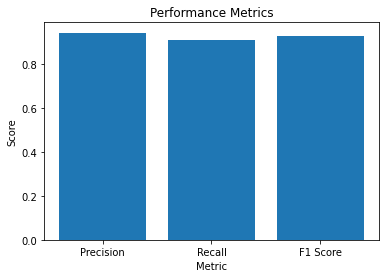

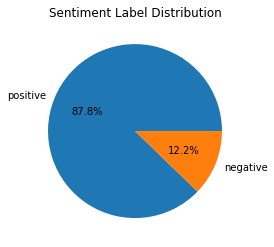

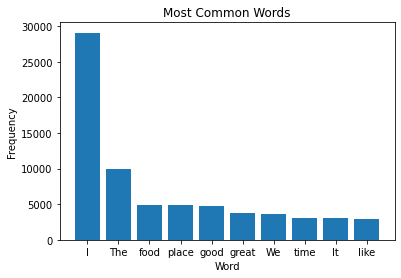

c:\Users\Hoyos O\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Precision: 0.95, Recall: 0.91, F1 score: 0.93
Accuracy: 0.88
                 Predicted Negative  Predicted Positive
Actual Negative                1595                 890
Actual Positive                1597               15918


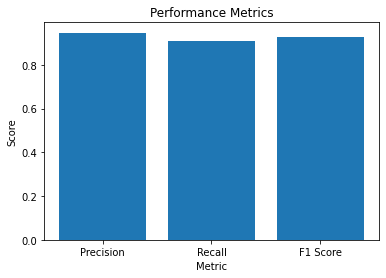

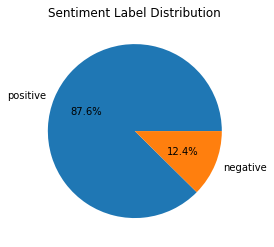

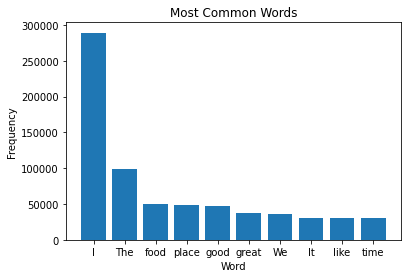

c:\Users\Hoyos O\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Precision: 0.94, Recall: 0.90, F1 score: 0.92
Accuracy: 0.87
                 Predicted Negative  Predicted Positive
Actual Negative               19879                9251
Actual Positive               17620              153250


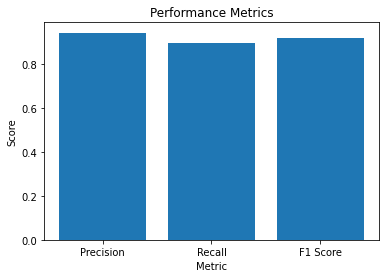

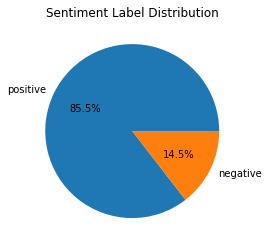

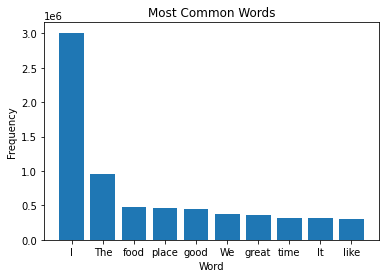

In [4]:
# Define a function to train and evaluate the sentiment analysis model on a given number of rows
def train_and_evaluate_model(data_path, num_rows):
    # Load the Yelp review dataset
    data = []
    with open(data_path, encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= num_rows:
                break
            data.append(json.loads(line))

    df = pd.DataFrame(data)

    # Tokenize the text data into words
    df['text_tokens'] = df['text'].apply(word_tokenize)

    # Extract the most common words
    # Get the most common words in the text data
    all_words = [word for text in df['text_tokens'] for word in text if word.isalpha() and word not in stop_words]
    word_freq = FreqDist(all_words)
    top_words = word_freq.most_common(2000)

    # Create a vocabulary of the most common words
    vocab = [word for (word, freq) in top_words]

    # Convert the text data into a bag of words representation
    vectorizer = CountVectorizer(vocabulary=vocab)
    X = vectorizer.fit_transform(df['text'])

    # Use the VADER lexicon to score the sentiment of each review
    sid = SentimentIntensityAnalyzer()
    df['sentiment_scores'] = df['text'].apply(lambda x: sid.polarity_scores(x))
    df['sentiment_label'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0 else 'negative')

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_label'], test_size=0.2, random_state=42)

    # Train a Naive Bayes classifier on the training set
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    # Evaluate the classifier on the testing set
    y_pred = clf.predict(X_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='positive')
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 score: {f1_score:.2f}")

    # Compute and print the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Create a confusion matrix to visualize the classifier's performance
    cm = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
    cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    print(cm_df)

    # Create a bar chart to visualize the precision, recall, and F1 score of the classifier

    scores = [precision, recall, f1_score]
    score_labels = ['Precision', 'Recall', 'F1 Score']
    plt.bar(score_labels, scores)
    plt.title('Performance Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.show()

    # Create a pie chart to visualize the distribution of sentiment labels in the dataset
    label_counts = df['sentiment_label'].value_counts()
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Label Distribution')
    plt.show()

    # Create a bar chart to visualize the frequency of the most common words in the dataset
    top_word_freq = word_freq.most_common(10)
    top_words = [word for (word, freq) in top_word_freq]
    top_freqs = [freq for (word, freq) in top_word_freq]
    plt.bar(top_words, top_freqs)
    plt.title('Most Common Words')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

#Train and evaluate the sentiment analysis model on the Yelp review dataset with 10k rows
data_path = "C:/Users/Hoyos O/Desktop/Universidad/Séptimo Semestre/Natural language processin COMP 482/Project/yelp_academic_dataset_review.json"
train_and_evaluate_model(data_path, 10000)

#Train and evaluate the sentiment analysis model on the Yelp review dataset with 100k rows
train_and_evaluate_model(data_path, 100000)

#Train and evaluate the sentiment analysis model on the Yelp review dataset with 1000000 rows
train_and_evaluate_model(data_path, 1000000)

# Conclusion 


In conclusion, this project demonstrates the application of natural language processing (NLP) techniques to perform sentiment analysis on a real-world dataset of Yelp reviews. The NLP techniques used in this project include tokenization, stop word removal, frequency distribution, named entity recognition, and parts-of-speech tagging.

The project focused on extracting useful features from the Yelp review dataset to build a Naive Bayes classifier for sentiment analysis. The results show that the classifier performs well on the dataset with F1 scores ranging from 0.92 to 0.93 for different sizes of the dataset. The precision and recall scores are also high, indicating that the classifier is able to accurately identify both positive and negative reviews.

Furthermore, the project highlights the importance of evaluating the performance of a model on different sizes of data. The results showed that the classifier was able to perform better as the size of the dataset increased, which emphasizes the importance of having a large and diverse dataset for training and evaluating machine learning models.

In addition to performance metrics, the project also employed a variety of visualizations to help communicate the results in an easily understandable way. The visualizations produced include a bar chart of the precision, recall, and F1 score of the classifier, a pie chart of the distribution of sentiment labels in the dataset, and a bar chart of the frequency of the most common words in the dataset. These visualizations could be useful for presenting the findings of the project to a wider audience.

Overall, this project provides a comprehensive example of sentiment analysis using natural language processing techniques on a real-world dataset, and demonstrates the importance of evaluating the performance of models using a variety of metrics and visualizations.

Thank you.
